In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
d1 = pd.read_csv("Fraud_check.csv")
d1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
d1.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

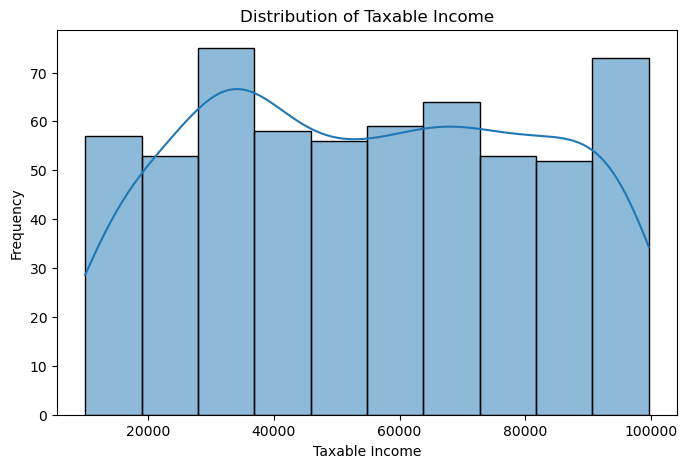

In [5]:
#data visulaisation
plt.figure(figsize=(8, 5))
sns.histplot(d1["Taxable.Income"], bins=10, kde=True)
plt.title("Distribution of Taxable Income")
plt.xlabel("Taxable Income")
plt.ylabel("Frequency")
plt.show()

In [6]:
#assigning target variable
y=d1["Taxable.Income"]
y

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64

In [7]:
threshold=30000
y = y.apply(lambda x: 'Risky' if x <= threshold else 'Good')
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: object

In [8]:
x=d1.drop("Taxable.Income",axis=1)
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO
...,...,...,...,...,...
595,YES,Divorced,39492,7,YES
596,YES,Divorced,55369,2,YES
597,NO,Divorced,154058,0,YES
598,YES,Married,180083,17,NO


In [9]:
for columns in x.columns:
    if columns in ["Undergrad","Marital.Status","Urban"]:
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        x[columns]=le.fit_transform(x[columns])
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [10]:
training_Accuracy=[]
testing_accuracy=[]
#applying cross validation method with Random forest classifier
for i in range(1,101):
    x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.30,random_state=i)
    rfc=RandomForestClassifier(n_estimators=100,
                             max_samples=0.6,
                             max_features=0.7,max_depth=8)
    rfc.fit(x_train,y_train)
    y_pred_train=rfc.predict(x_train)
    y_pred_test=rfc.predict(x_test)
    testing_accuracy.append(accuracy_score(y_train, y_pred_train))
    training_Accuracy.append(accuracy_score(y_test, y_pred_test))


In [11]:
print("average training accuracy :",np.mean(training_Accuracy))
print("average testing accuracy :",np.mean(testing_accuracy))

average training accuracy : 0.7836111111111111
average testing accuracy : 0.8413095238095236


In [12]:
if np.mean(testing_accuracy) > 0.8:
    print("The SVM model demonstrates a satisfactory level of accuracy on the testing set.")
    print("It appears to generalize well to new, unseen data.")
else:
    print("While the training accuracy is relatively high, the testing accuracy is slightly lower.")
    print("This could indicate a potential issue with overfitting or the need for model fine-tuning.")
    print("Consider adjusting hyperparameters or exploring other algorithms for further improvement.")


The SVM model demonstrates a satisfactory level of accuracy on the testing set.
It appears to generalize well to new, unseen data.
